### Introduction
This dataset contains employee information classified into two groups, one group that left and the other that stayed. There is also information on various metrics related to their experience within the company. 

This notebook contains Data wrangling, Exploratory Data Analysis of the data to uncover insights into the turnover.
The main programming language used is Python.
Dataset has been downloaded from https://www.kaggle.com/ludobenistant/hr-analytics


In [1]:
from IPython.display import display, HTML
js ="""<script>
function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>"""

display(HTML(js))

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib import font_manager as fm
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import scipy.stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
#load dataset
hr = pd.read_csv('C:\\Users\\dxd4380\\Documents\\personal\\Programming samples\\Python\\1.Data Viz- HR Analytics\\HR_comma_sep.csv')
#hr = pd.DataFrame.from_csv('../1.Data Viz- HR Analytics/HR_comma_sep.csv', index_col=None)

### How many rows and columns in this dataset?

In [3]:
# Initial investigation
sh=hr.shape
print("Number of rows in this dataset is {} and number of columns is {}".format(hr.shape[0],hr.shape[1]))

Number of rows in this dataset is 14999 and number of columns is 10


### How does the data look like?

In [4]:
hr.head()
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


### Column header formatting
Rename columns if needed to make them more understandable by using the rename function

In [5]:
hr = hr.rename(columns={'satisfaction_level': 'Satisfaction_Level', 'last_evaluation': 'Last_Evaluation',
'average_montly_hours': 'Average_Monthly_Hours', 'number_project': 'Number_of_Projects',
'time_spend_company': 'Time_Spend_Company','Work_accident':'Work_Accident','left':'Left','promotion_last_5years':'Promotion_Last_5_Years','sales':'Department','salary':'Salary'})
print(list(hr.columns.values));

['Satisfaction_Level', 'Last_Evaluation', 'Number_of_Projects', 'Average_Monthly_Hours', 'Time_Spend_Company', 'Work_Accident', 'Left', 'Promotion_Last_5_Years', 'Department', 'Salary']


### Is the data Tidy?
Principles of Tidy data

    * Each variable must have its own column.
    All metrics associated with an employee are in their own column
    * Each observation must have its own row.
    Each employee has a separate row
    * Each value must have its own cell.
    Each cell in this dataset represent a single value

### Check for NaN values
There are no NaN values in this dataset

In [6]:
print(hr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
Satisfaction_Level        14999 non-null float64
Last_Evaluation           14999 non-null float64
Number_of_Projects        14999 non-null int64
Average_Monthly_Hours     14999 non-null int64
Time_Spend_Company        14999 non-null int64
Work_Accident             14999 non-null int64
Left                      14999 non-null int64
Promotion_Last_5_Years    14999 non-null int64
Department                14999 non-null object
Salary                    14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Investigate data values
Investigate unique values and their frequencies to determine blanks, empty strings, unformatted values and strange values that should not be a part of the data

Following output shows the unique values in each column and the frequency at which they appear. 
This gives a quick understanding if there are any values in the dataset that are anomalous

In [7]:
print(hr['Number_of_Projects'].value_counts(dropna=False))
print(hr['Time_Spend_Company'].value_counts(dropna=False))
print(hr['Work_Accident'].value_counts(dropna=False))
print(hr['Left'].value_counts(dropna=False))
print(hr['Department'].value_counts(dropna=False))
print(hr['Salary'].value_counts(dropna=False))


4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: Number_of_Projects, dtype: int64
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: Time_Spend_Company, dtype: int64
0    12830
1     2169
Name: Work_Accident, dtype: int64
0    11428
1     3571
Name: Left, dtype: int64
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64
low       7316
medium    6446
high      1237
Name: Salary, dtype: int64


### View summary statistics to check if columns contain valid values

In [8]:
hr.describe()

,Satisfaction_Level,Last_Evaluation,Number_of_Projects,Average_Monthly_Hours,Time_Spend_Company,Work_Accident,Left,Promotion_Last_5_Years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Classify types of data

### Quantitative:
* <font color='red'>Continuous variables: Satisfaction_Level, Last_Evaluation, Average_Monthly_Hours</font>
Note:In later steps, converted Satisfaction Level into a discrete number by rounding off to the closest decimal 
* <font color='red'>Discrete: Average_Monthly_Hours, Time_Spend_Company, Number_of_Projects</font>

### Qualitative/ Categorical:
* <font color='red'>Binary:Work_Accident, Left, Promotion_Last_5_Years</font>
* <font color='red'>Unordered/Nominal: Department</font>
* <font color='red'>Ordered/Ordinal: Salary</font>


To understand differences between different types of data, please read:


### Check data formats
Use Regex to check if the data formats are correct. "Show code" to see the code snippet.

For Satisfaction Level, the following format is expected 123.23.
If the format is not matched this code will output the list of invalid values

In [9]:
# Create the series 
saisfaction_levels=hr['Satisfaction_Level'].astype(str)

# Drop all the duplicates 
saisfaction_levels  = saisfaction_levels.drop_duplicates()

# Write the regular expression: pattern
pattern = '^\d*\.\d{1,2}$'

# Create the Boolean vector: mask
mask = saisfaction_levels.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset using mask_inverse: invalid
invalid_saisfaction_levels = saisfaction_levels.loc[mask_inverse]

# Print invalid
print(invalid_saisfaction_levels)

Series([], Name: Satisfaction_Level, dtype: object)


Average_Monthly_Hours is expected to be a numeric. If not the following code will output a list of invalid values

In [10]:
monthly_hours=hr['Average_Monthly_Hours'].astype(str)

# Drop all the duplicates 
monthly_hours  = monthly_hours.drop_duplicates()

# Write the regular expression: pattern
pattern = '^\d*$'

# Create the Boolean vector: mask
mask = monthly_hours.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid
invalid_monthly_hours = monthly_hours.loc[mask_inverse]

# Print invalid
print(invalid_monthly_hours)

Series([], Name: Average_Monthly_Hours, dtype: object)


### Column Data Formatting
Ensuring some of the text fields have good formatting for graphs and other analysis purposes

In [11]:
hr['Department']=hr.Department.str.title()
hr.loc[hr.Department == 'Hr', 'Department']= 'HR'
hr.loc[hr.Department == 'It', 'Department']= 'IT'
hr.loc[hr.Department == 'Product_Mng', 'Department']= 'Product Management'
hr.loc[hr.Department == 'Randd', 'Department']= 'R&D'
hr['Salary']=hr.Salary.str.title()
print('Departments after data formatting',hr['Department'].unique())

Departments after data formatting ['Sales' 'Accounting' 'HR' 'Technical' 'Support' 'Management' 'IT'
 'Product Management' 'Marketing' 'R&D']


# Exploratory Data Analysis & Statistical Tests

### Helper functions

#### Chi-Square Test for Independence. 
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [12]:

def chitest(response_variable_vals, explanatory_variable_vals):
    ct1=pd.crosstab(response_variable_vals, explanatory_variable_vals)
    print(ct1)

    # column percentages
    print("Column Percentages")
    colsum=ct1.sum(axis=0)
    colpct=ct1/colsum
    print(colpct)

    # chi-square
    print ('chi-square value, p value, expected counts')
    cs1= scipy.stats.chi2_contingency(ct1)
    print (cs1)

#### Mc Nemar Test (Paired Chi-Square Test for Independence)
Compare every category of the categorical variable against each other to determine association between different categories.

In [13]:
### Defining resusable function for reusable pairwise chi tests
import itertools

def pairwise_chitests(response_variable_vals, explanatory_variable_vals):
    pairs=itertools.combinations(np.arange(pd.Series.nunique(explanatory_variable_vals)),2)
    
    df=pd.DataFrame(pd.crosstab(response_variable_vals,explanatory_variable_vals))

    # column percentages
    colsum=df.sum(axis=0)
    colpct=df/colsum
    print(colpct)
    plist=list()
    for pair in list(pairs):
        ct1=df.iloc[:,[pair[0],pair[1]]]
        #print(ct1)
        # chi-square
        colsum=ct1.sum(axis=0)
        rowsum=ct1.sum(axis=1)
        colpct=ct1/colsum
        #print(colpct)
        #print ('chi-square value, p value, expected counts')
        if (rowsum>0).all():
            cs1= scipy.stats.chi2_contingency(ct1)       
        #print(cs1) 
        plist.append([list(ct1),cs1[1]])
    #print ('p values for all pairwise chi-square tests')
    #for pval in plist:
     #   print(pval)

    #Let's print the pairs for which p value is less than the p value determined after the bonferroni correction
    bonalpha=0.05/pd.Series.nunique(explanatory_variable_vals)

    #print(bonalpha)

    pval_sig = [pval if pval[1] < bonalpha else '' for pval in plist]

    print ('p values less than significance level after Bonferroni correction for all pairwise chi-square tests')
    for pval_sig in pval_sig:
        print(pval_sig)

### Overall Turnover is 24%

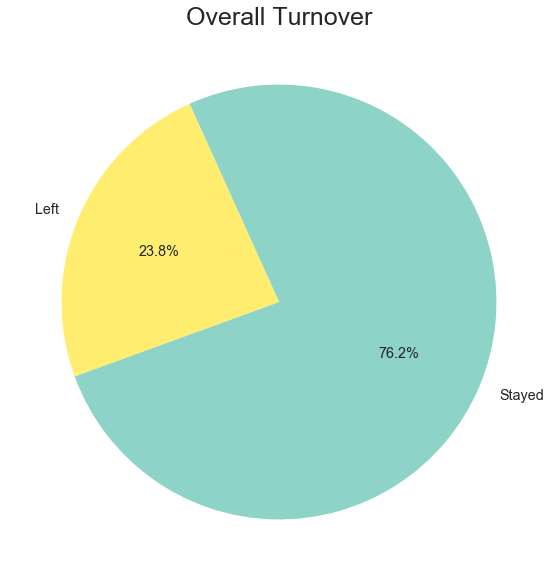

In [14]:
#Determine the overall turnover from the sample data
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title("Overall Turnover", fontsize = 25)

#This helps get the pie chart fit into the frame
x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

#Set the figure frame
fig.set_size_inches((width, height));

#dataframe with number employees that left and that stayed
dfAll=hr.groupby(['Left']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., 2))

#Create a pie chart
patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=['Stayed','Left'],autopct='%1.1f%%',colors=colors1,startangle=200);
#Set the font size
proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease);

### Turnover by Salary Category

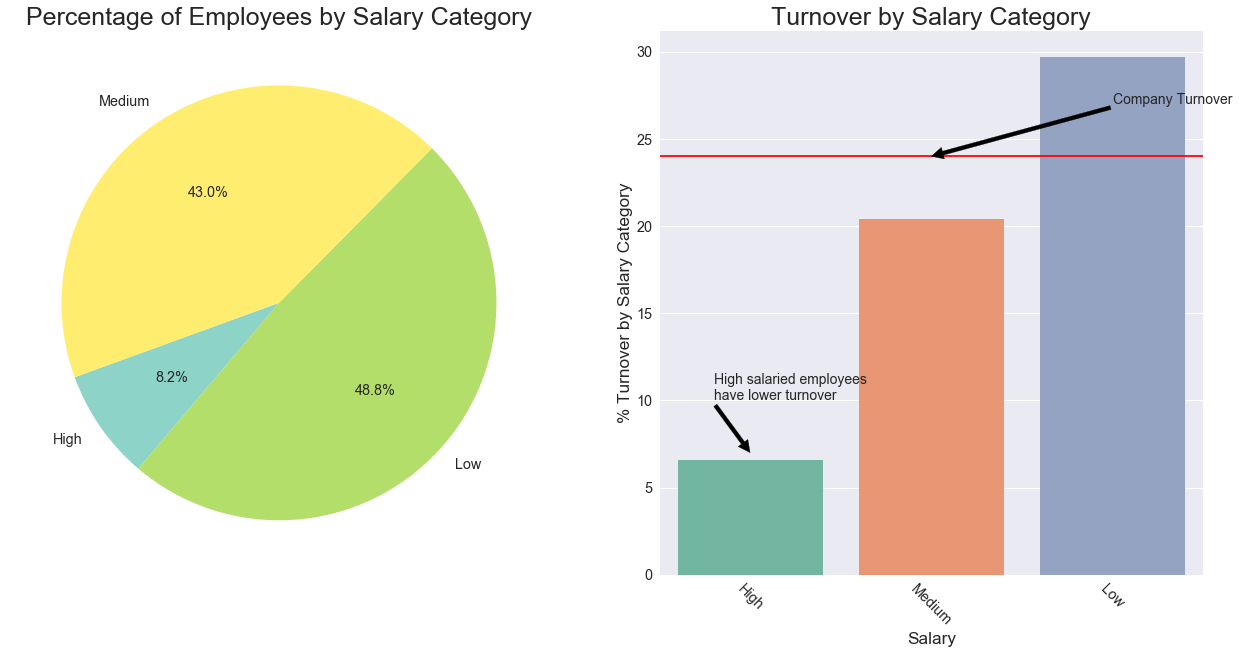

In [15]:
fig = plt.figure()

#Add two subplots for Percentage of Employees by Salary Category and Turnover by Salary Category
ax1 = fig.add_subplot(121)
plt.title("Percentage of Employees by Salary Category", fontsize = 25)
ax2 = fig.add_subplot(122)
plt.title("Turnover by Salary Category",fontsize=25)

#This helps get the pie chart fit into the frame
x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

#Set the figure frame
fig.set_size_inches((width, height))

#dataframe with number employees that left and that stayed by salary type
dfAll=hr.groupby(['Salary']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., len(dfAll['Salary'])))

#Create a pie chart
patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=dfAll['Salary'],autopct='%1.1f%%',colors=colors1,startangle=200);

#Set the font size for pie chart
proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

#dataframe with number employees that left and that stayed by salary
dfsal=hr.groupby(['Salary', 'Left']).size().reset_index(name='Num_left')

#Keep rows only with the left
dfleftsal=dfsal[(dfsal.Left == 1)]

#Create a dataframe with salary category, number of employees left in the salary category, Total employees in the salary category
dfleftsalall=pd.merge(dfAll,dfleftsal, on='Salary')

#Add Turnover column, (number of employees left/total employees) * 100
dfleftsalall['Dept_Turnover'] = dfleftsalall.apply(lambda row: round(row['Num_left']/row['Num_employees']*100,1),axis=1)
dfleftsalall=dfleftsalall.sort_values(by='Dept_Turnover')
#Create a bar chart with turnover by department
g=sns.factorplot(x="Salary", y="Dept_Turnover", data=dfleftsalall, kind="bar",palette="Set2",ax=ax2)
#Always keep this after g

#set font size
plt.close(g.fig);
plt.xlabel("Salary",size='xx-large')
plt.ylabel("% Turnover by Salary Category",size='xx-large')
plt.xticks(rotation=-45,size='x-large')
plt.yticks(size='x-large')

#Add pointers for explaining the output
ax2.axhline(y=24, color='r', linestyle='-')
ax2.annotate('Company Turnover', xy=(1, 24),xytext=(2,27),
          arrowprops=dict(facecolor='black'),size=14
           )
annotate_string=r"High salaried employees"
annotate_string+="\n"
annotate_string+=r"have lower turnover"
ax2.annotate(annotate_string, xy=(0, 7),xytext=(-0.2,10),
          arrowprops=dict(facecolor='black'),size=14)
plt.show()

### Statistical Test: Is the difference in number of employees that left among salary categories statistically significant?

In [16]:
# Chi-squared test can 
chitest(hr['Left'],hr['Salary'])

Salary  High   Low  Medium
Left                      
0       1155  5144    5129
1         82  2172    1317
Column Percentages
Salary      High       Low    Medium
Left                                
0       0.933711  0.703116  0.795687
1       0.066289  0.296884  0.204313
chi-square value, p value, expected counts
(381.22504706621061, 1.6520867492960049e-83, 2, array([[  942.49189946,  5574.18814588,  4911.31995466],
       [  294.50810054,  1741.81185412,  1534.68004534]]))


Low p-value suggests that we can reject the null hypothesis

When the 'Explanatory variable' (which in this case is Salary) has more than two levels, the chi square value and p-value do not provide insight into why the null hypothesis can be rejected.

Additional pair wise chi tests or McNemar's test can be conducted to find the categories that are different from each other. 

For three salary categories, we will have to conduct three pair comparisions to see which of the pairs are different from each other.

Family-wise error rate (FWER) is the probability of making one or more false discoveries, or type I errors when performing multiple hypotheses tests, more comparisions we make the more likely are we to make a type 1 error. A Type I error (sometimes called a Type 1 error), is the incorrect rejection of a true null hypothesis.

FMER = 1-(1-a)^n where a is the alpha level which is usually 5% and n is the number of tests which in this case is 3
FMER=0.142, there is 14% chance of type 1 error.

Bonferroni correction is one of the ways to handle FMER. bonferroni correction reduces the value of alpha which makes it more difficult to reject the null hypothesis, following two steps need to be followed.

    Divide the alpha level by the number of tests you’re running and apply that alpha level to each individual test. In our case overall alpha level is .05 and we are running 3 tests, then each test will have an alpha level of .05/3 = .0167.
    Apply the new alpha level to each test for finding p-values. In this case, the p-value would have to be .0167 or less for statistical significance.
    
   Perform chi tests for all the pairs and determine variations across the groups


In [17]:
#Pair-wise chi test/Mc Nemar's test to investigate if there certain categories with a higher difference.
pairwise_chitests(hr['Left'],hr['Salary'])

Salary      High       Low    Medium
Left                                
0       0.933711  0.703116  0.795687
1       0.066289  0.296884  0.204313
p values less than significance level after Bonferroni correction for all pairwise chi-square tests
[['High', 'Low'], 9.5322745284283013e-65]
[['High', 'Medium'], 1.6322956110970508e-30]
[['Low', 'Medium'], 1.6475199500800712e-35]


Low p value across all categories shows that the number of people that left across salary categories are significantly different.

### Department-wise Turnover

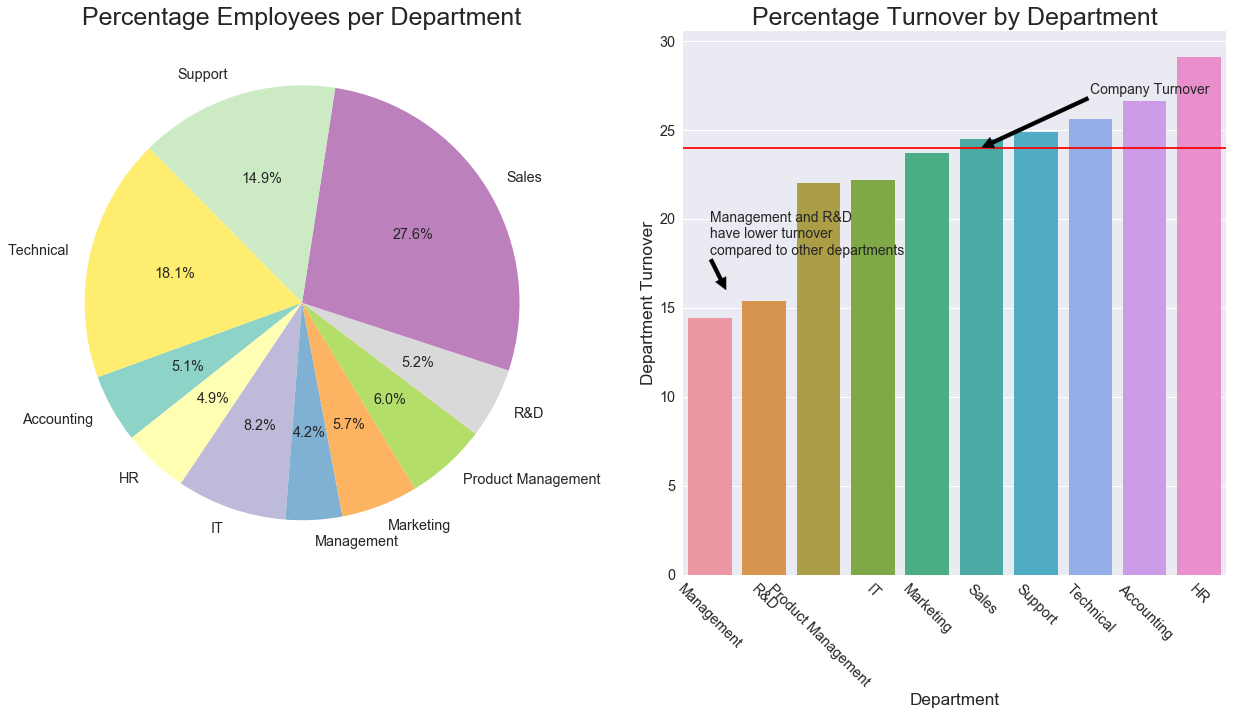

In [18]:
#Create a figure 
fig = plt.figure()
#Add two subplots for Percentage of Employees by Salary Category and Turnover by Salary
ax1 = fig.add_subplot(121)
plt.title("Percentage Employees per Department", fontsize = 25)
ax2 = fig.add_subplot(122)
plt.title("Percentage Turnover by Department",fontsize=25)
#This helps get the pie chart fit into the frame
x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

#Set the figure frame
fig.set_size_inches((width, height))

#dataframe with number employees that left and that stayed by department
dfAll=hr.groupby(['Department']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., len(dfAll['Department'])))

#Create a pie chart
patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=dfAll['Department'],autopct='%1.1f%%',colors=colors1,startangle=200);

#Set the font size for pie chart
proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

#dataframe with number employees that left and that stayed by department
dfdept=hr.groupby(['Department', 'Left']).size().reset_index(name='Num_left')
#Keep rows only with the left
dfleftdept=dfdept[(dfdept.Left == 1)]

#Create a dataframe with department, number of employees left in the salary category, Total employees in the salary category
dfleftdeptall=pd.merge(dfAll,dfleftdept, on='Department')

#Add Turnover column, (number of employees left/total employees) * 100
dfleftdeptall['Dept_Turnover'] = dfleftdeptall.apply(lambda row: round(row['Num_left']/row['Num_employees']*100,1),axis=1)
dfleftdeptall=dfleftdeptall.sort_values(by='Dept_Turnover')

#Create a bar chart with turnover by department
g=sns.factorplot(x="Department", y="Dept_Turnover", data=dfleftdeptall, kind="bar",ax=ax2)
#Always keep this after g

plt.close(g.fig);

#set font size
plt.xlabel("Department",size='xx-large')
plt.ylabel("Department Turnover",size='xx-large')
plt.xticks(rotation=-45,size='x-large')
plt.yticks(size='x-large')

#Add pointers for explaining the output
ax2.axhline(y=24, color='r', linestyle='-')
ax2.annotate('Company Turnover', xy=(5, 24),xytext=(7,27),
          arrowprops=dict(facecolor='black'),size=14)
annotate_string=r"Management and R&D"
annotate_string+="\n"
annotate_string+=r"have lower turnover"
annotate_string+="\n"
annotate_string+=r"compared to other departments"
ax2.annotate(annotate_string, xy=(0.3, 16),xytext=(0,18),
          arrowprops=dict(facecolor='black'),size=14)

plt.show()

### Statistical Test: Is the difference in number of employees that left among departments statistically significant?

In [19]:
#Chi squared test is used as the statistical test
chitest(hr['Left'],hr['Department'])

Department  Accounting   HR   IT  Management  Marketing  Product Management  \
Left                                                                          
0                  563  524  954         539        655                 704   
1                  204  215  273          91        203                 198   

Department  R&D  Sales  Support  Technical  
Left                                        
0           666   3126     1674       2023  
1           121   1014      555        697  
Column Percentages
Department  Accounting        HR        IT  Management  Marketing  \
Left                                                                
0             0.734029  0.709066  0.777506    0.855556   0.763403   
1             0.265971  0.290934  0.222494    0.144444   0.236597   

Department  Product Management       R&D     Sales   Support  Technical  
Left                                                                     
0                     0.780488  0.846252  0.755072  0.75100

Low p-value suggests that we can reject the null hypothesis, difference in number of employees that left among departments is statistically significant

In [20]:
#Pair-wise chi test/Mc Nemar's test to investigate if there certain categories with a higher difference.
pairwise_chitests(hr['Left'],hr['Department'])

Department  Accounting        HR        IT  Management  Marketing  \
Left                                                                
0             0.734029  0.709066  0.777506    0.855556   0.763403   
1             0.265971  0.290934  0.222494    0.144444   0.236597   

Department  Product Management       R&D     Sales   Support  Technical  
Left                                                                     
0                     0.780488  0.846252  0.755072  0.751009    0.74375  
1                     0.219512  0.153748  0.244928  0.248991    0.25625  
p values less than significance level after Bonferroni correction for all pairwise chi-square tests


[['Accounting', 'Management'], 4.4518236654814891e-08]


[['Accounting', 'R&D'], 7.6132814060494985e-08]



[['HR', 'IT'], 0.00081220216310564112]
[['HR', 'Management'], 1.368474637114229e-10]

[['HR', 'Product Management'], 0.0011151004563559666]
[['HR', 'R&D'], 1.5391241657131945e-10]



[['IT', 'Management'], 7.828478435

As expected, the difference in the number of employees between R&D and Management and other departments statistically significant.

### Turnover based on Tenure

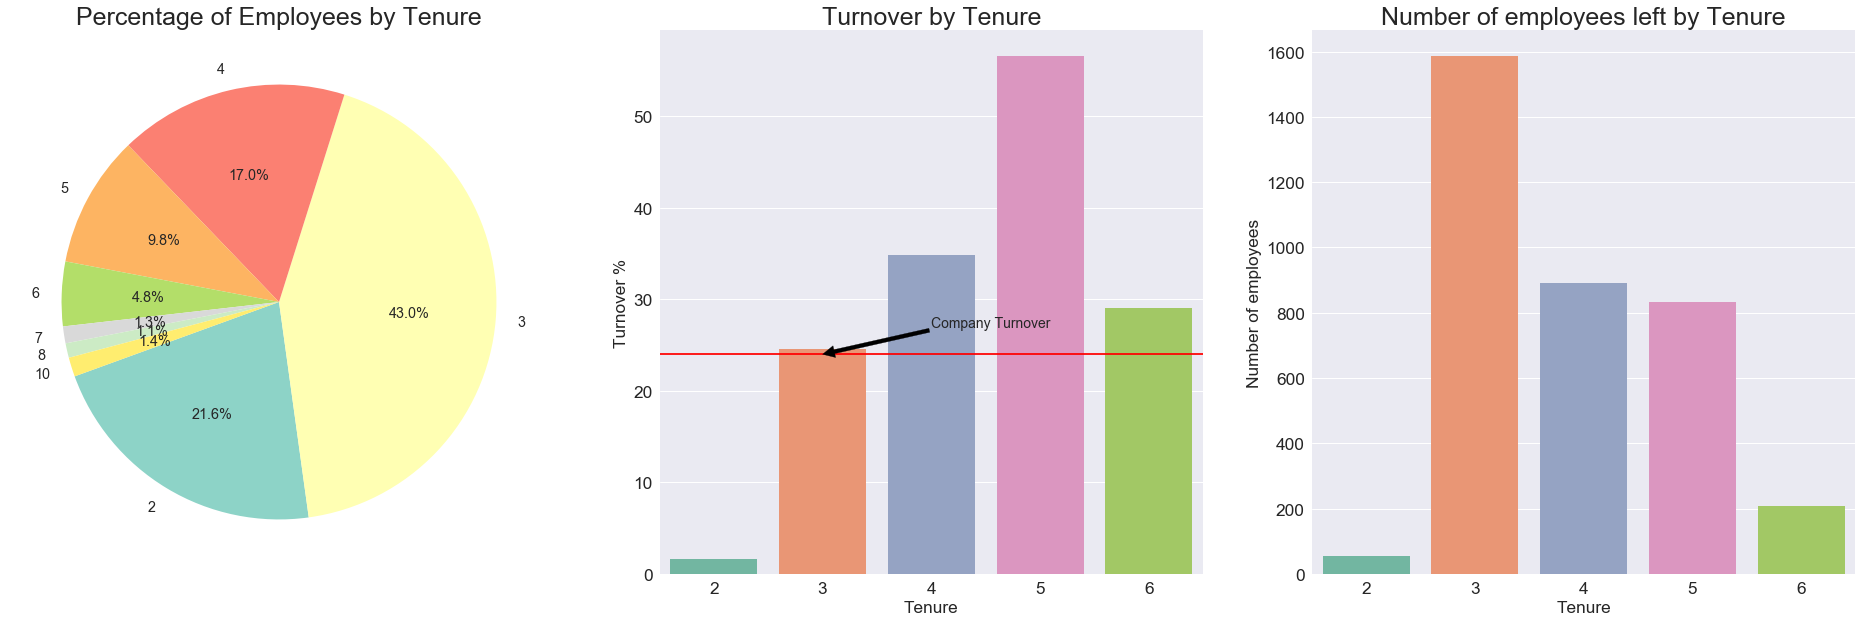

In [53]:
#Let's start by adding a figure
fig = plt.figure()

#Add two subplots for Percentage of Employees by Tenure and Number of employees left by Tenure
ax1 = fig.add_subplot(131)
plt.title("Percentage of Employees by Tenure", fontsize = 25)
ax2 = fig.add_subplot(132)
plt.title("Turnover by Tenure",fontsize=25)
ax3 = fig.add_subplot(133)
plt.title("Number of employees left by Tenure",fontsize=25)

#This helps get the pie chart fit into the frame
x0, y0, dx, dy = ax1.get_position().bounds
maxd = max(dx, dy)
width =10 * maxd / dx
height = 10 * maxd / dy

#Set the figure frame
fig.set_size_inches((width, height))

#dataframe with number employees that left and that stayed by tenure
dfAll=hr.groupby(['Time_Spend_Company']).size().reset_index(name='Num_employees')
cmap = plt.cm.Set3
colors1 = cmap(np.linspace(0., 1., len(dfAll['Time_Spend_Company'])))

#Create a pie chart
patches, texts, autotexts = ax1.pie(dfAll['Num_employees'], labels=dfAll['Time_Spend_Company'],autopct='%1.1f%%',colors=colors1,startangle=200);

#Set the font size for pie chart
proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

#dataframe with number employees that left and that stayed by tenure
df=hr.groupby(['Time_Spend_Company', 'Left']).size().reset_index(name='Num_left')
#Keep rows only with the left
dfleft=df[(df.Left == 1)]
dfleft=dfleft.sort_values(by='Num_left')
#Create a dataframe with tenure, number of employees left , Total employees
dfleftall=pd.merge(dfAll,dfleft, on='Time_Spend_Company')
dfleftall['Tenure_Turnover'] = dfleftall.apply(lambda row: round(row['Num_left']/row['Num_employees']*100,1),axis=1)
dfleftall=dfleftall.sort_values(by='Tenure_Turnover')
#Create a bar chart with turnover by tenure
g=sns.factorplot(x="Time_Spend_Company", y="Tenure_Turnover", data=dfleftall, kind="bar",palette="Set2",ax=ax2)
#Always keep this after g
#Create a bar chart with number of employees left
plt.close(g.fig);
h=sns.factorplot(x="Time_Spend_Company", y="Num_left", data=dfleft, kind="bar",palette="Set2",ax=ax3)
plt.close(h.fig);
#set font size
 
ax2.set_xlabel("Tenure",size='xx-large')
ax2.set_ylabel("Turnover %",size='xx-large')
ax2.tick_params(axis='both',labelsize='xx-large')

ax3.set_xlabel("Tenure",size='xx-large')
ax3.set_ylabel("Number of employees",size='xx-large')
ax3.tick_params(axis='both',labelsize='xx-large')

#Add pointers for explaining the result
ax2.axhline(y=24, color='r', linestyle='-')
ax2.annotate('Company Turnover', xy=(1, 24),xytext=(2,27),
          arrowprops=dict(facecolor='black'),size=14
           )
plt.show()

In terms of turnover within a tenure category, employees with 5 years in the company have the highest turnover followed by 4, 6 and 3 year categories. There is no turnover among the 7,8,10 categories.

Most employees in the company have tenure between 2 to 5 years. Most employees leave the company around 3 to 6 years of service

### Statistical Test: Is the difference in number of employees that left among salary categories statistically significant?

In [22]:
#Chi squared test is used as the statistical test  
chitest(hr['Left'],hr['Time_Spend_Company'])

Time_Spend_Company    2     3     4    5    6    7    8    10
Left                                                         
0                   3191  4857  1667  640  509  188  162  214
1                     53  1586   890  833  209    0    0    0
Column Percentages
Time_Spend_Company        2         3         4         5         6    7   \
Left                                                                        
0                   0.983662  0.753841  0.651936  0.434487  0.708914  1.0   
1                   0.016338  0.246159  0.348064  0.565513  0.291086  0.0   

Time_Spend_Company   8    10  
Left                          
0                   1.0  1.0  
1                   0.0  0.0  
chi-square value, p value, expected counts
(2110.079505335631, 0.0, 7, array([[ 2471.66024402,  4909.03420228,  1948.2229482 ,  1122.30442029,
          547.05673712,   143.2404827 ,   123.43062871,   163.05033669],
       [  772.33975598,  1533.96579772,   608.7770518 ,   350.69557971,
          17

Low p-value suggests that we can reject the null hypothesis, difference in number of employees that left among salary categories is statistically significant

In [23]:
#Pair-wise chi test/Mc Nemar's test to investigate if there certain categories with a higher difference.
pairwise_chitests(hr['Left'],hr['Time_Spend_Company'])

Time_Spend_Company        2         3         4         5         6    7   \
Left                                                                        
0                   0.983662  0.753841  0.651936  0.434487  0.708914  1.0   
1                   0.016338  0.246159  0.348064  0.565513  0.291086  0.0   

Time_Spend_Company   8    10  
Left                          
0                   1.0  1.0  
1                   0.0  0.0  
p values less than significance level after Bonferroni correction for all pairwise chi-square tests
[[2, 3], 5.7153355152139618e-178]
[[2, 4], 8.0864179312313032e-253]
[[2, 5], 0.0]
[[2, 6], 2.4943329035560727e-157]



[[3, 4], 2.0940856651178304e-22]
[[3, 5], 5.3207964647515493e-127]

[[3, 7], 1.2348003028840194e-14]
[[3, 8], 8.6069105788171165e-13]
[[3, 10], 1.8060779086585128e-16]
[[4, 5], 5.7174555565772449e-41]
[[4, 6], 0.0049191839757310053]
[[4, 7], 1.6786707334389032e-22]
[[4, 8], 1.1986081333004386e-19]
[[4, 10], 2.5067504305716885e-25]
[[5, 6], 2.5486

After the pair wise chi test, no particular category emerges as being more statistically different from other categories

### Employees Promoted in the last 5 years


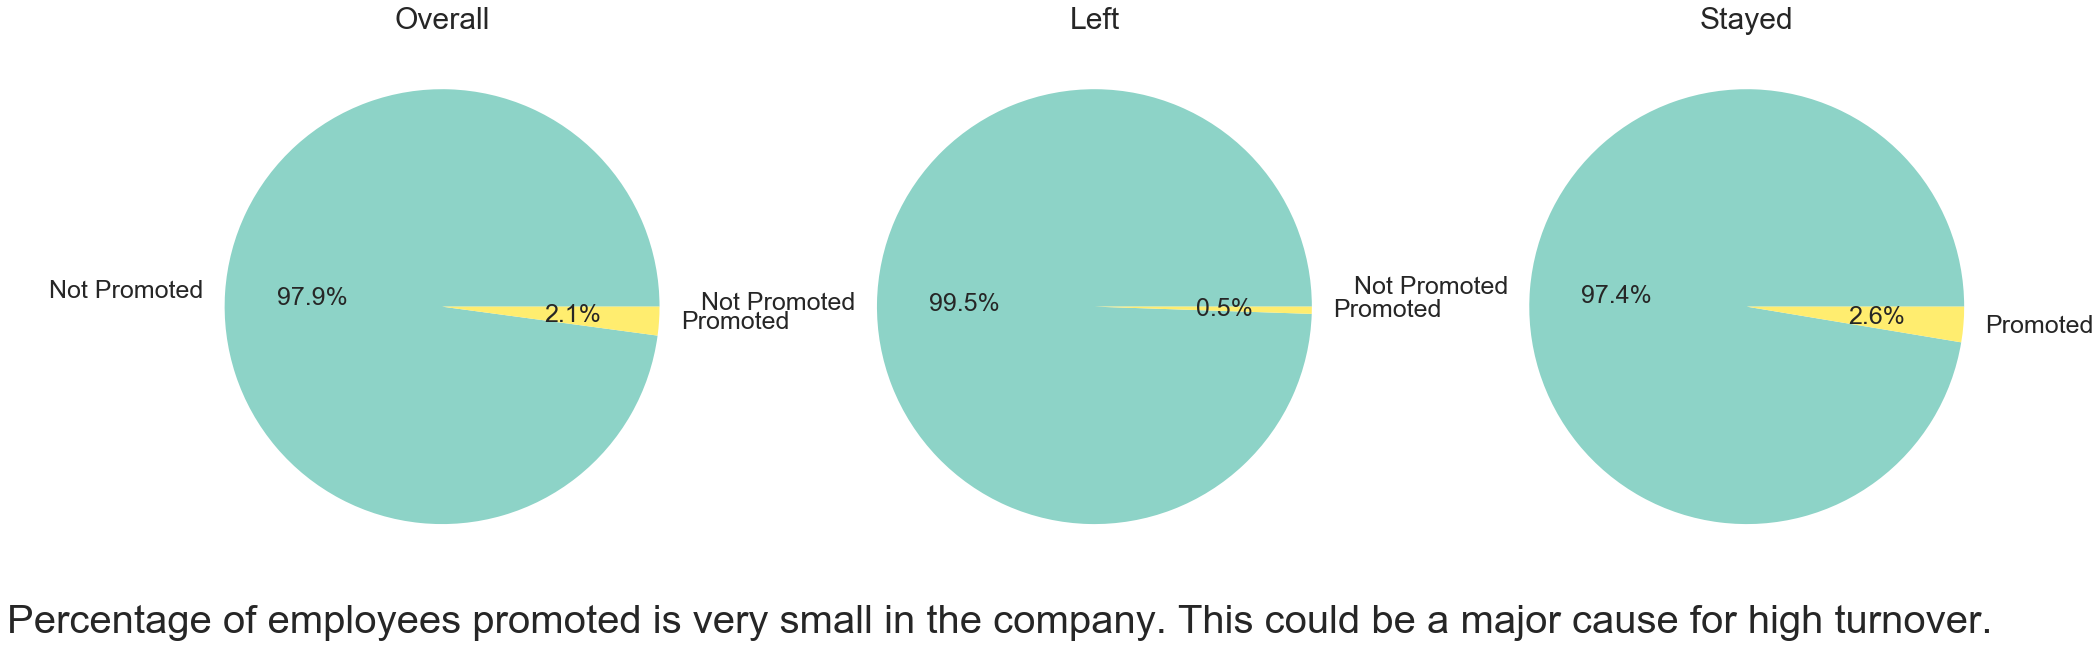

In [24]:
#Create a figure
fig = plt.figure();

#Add three subplots for promotions overall, Left and stayed 
ax1 = fig.add_subplot(131);
plt.title("Overall", fontsize = 30);
ax2 = fig.add_subplot(132);
plt.title("Left",fontsize=30);
ax3 = fig.add_subplot(133);
plt.title("Stayed",fontsize=30);

#This helps get the pie chart fit into the frame
ax1.text(-2,-1.5,'Percentage of employees promoted is very small in the company. This could be a major cause for high turnover.',fontsize=40)
x0, y0, dx, dy = ax1.get_position().bounds;
maxd = max(dx, dy);
width =10 * maxd / dx;
height = 10 * maxd / dy;
fig.set_size_inches((width, height));
dfprom1=hr.groupby(['Promotion_Last_5_Years']).size().reset_index(name='Num_left');
cmap = plt.cm.Set3;
colors1 = cmap(np.linspace(0., 1., 2));

#Overall
patches, texts, autotexts = ax1.pie(dfprom1['Num_left'], labels=['Not Promoted','Promoted'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);

dfprom=hr.groupby(['Promotion_Last_5_Years', 'Left']).size().reset_index(name='Num_left');
dfleftprom=dfprom[(dfprom.Left == 1)];
dfstayedprom=dfprom[(dfprom.Left == 0)];

#Left
patches, texts, autotexts = ax2.pie(dfleftprom['Num_left'], labels=['Not Promoted','Promoted'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease)

#Stayed
patches, texts, autotexts = ax3.pie(dfstayedprom['Num_left'], labels=['Not Promoted','Promoted'],autopct='%1.1f%%',colors=colors1);

proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);


### Statistical Test: This is merely an opinion, we would need more information to determine statistical significance.

### Satisfaction Level

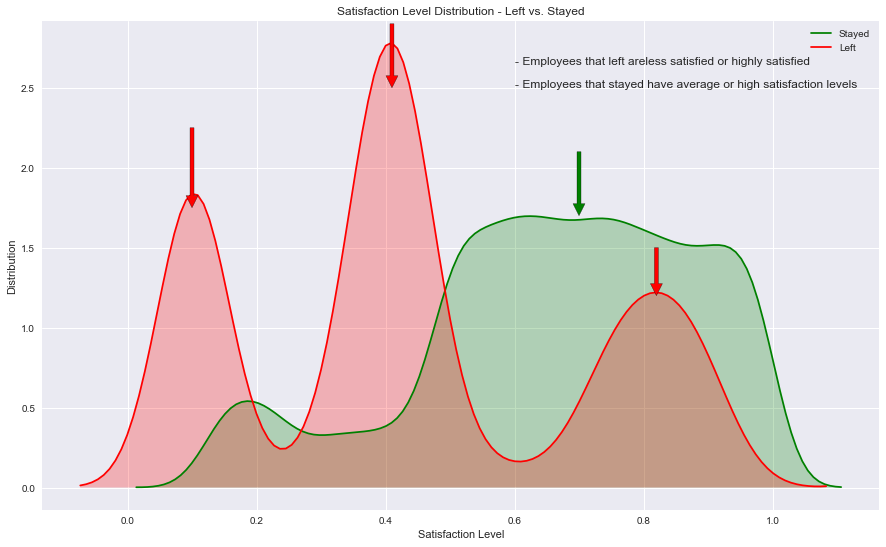

In [25]:
#Since Satisfaction level is a continuous variable, kerdel density would give a better idea of the distribution
# Kernel Density Plot
fig = plt.figure(figsize=(15,9),);
av_satisfaction=hr['Left'].mean();

#Kde for employees stayed in green
ax=sns.kdeplot(hr.loc[(hr['Left'] == 0),'Satisfaction_Level'] , color='g',shade=True,label='Stayed');

#Kde for employees that left in red
#Use the same axis for overlapping
ax=sns.kdeplot(hr.loc[(hr['Left'] == 1),'Satisfaction_Level'] , color='r',shade=True, label='Left');
ax.set(xlabel='Satisfaction Level', ylabel='Distribution');

#Labels and pointers for observations
plt.title('Satisfaction Level Distribution - Left vs. Stayed');
annotate_string=r"- Employees that left are"
annotate_string+=r"less satisfied or highly satisfied"
annotate_string+="\n\n"
annotate_string+='- Employees that stayed have average or high satisfaction levels'
ax.text(0.6,2.5,annotate_string,fontsize=12)
ax.annotate('', xy=(0.1, 1.75),xytext=(0.1,2.25),
         arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(0.41, 2.5),xytext=(0.41,2.9),
         arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(0.82, 1.2),xytext=(0.82,1.5),
        arrowprops=dict(facecolor='red'),size=14)
ax.annotate('', xy=(0.7,1.7),xytext=(0.7,2.1),
         arrowprops=dict(facecolor='green'),size=14)



### Statistical Test: Is the difference in number of employees that left among groups of employees with low and high levels of satisfaction statistically significant?

In [26]:
#Break down the employees into four categories 
#Employees that left with low satisfaction
#Employees that stayed with low satisfaction
#Employees that left with high satisfaction
#Employees that stayed with high satisfaction

#Used Z score to determine if the differences in the categories statistically significant
hr['Satisfaction_Level'] = hr.Satisfaction_Level.astype(float)

left=np.array(hr[(hr['Left'] == 1)].count()['Satisfaction_Level'])
stayed=np.array(hr[(hr['Left'] == 0)].count()['Satisfaction_Level'])

lowleft=np.array(hr[(hr['Satisfaction_Level']<0.5)&(hr['Left'] == 1)].count()['Satisfaction_Level'])
lowstayed=np.array(hr[(hr['Satisfaction_Level']<0.5)&(hr['Left'] == 0)].count()['Satisfaction_Level'])


highleft=np.array(hr[(hr['Satisfaction_Level']>=0.5)&(hr['Left'] == 1)].count()['Satisfaction_Level'])
highstayed=np.array(hr[(hr['Satisfaction_Level']>=0.5)&(hr['Left'] == 0)].count()['Satisfaction_Level'])


z_score_low, p_value_low = sm.stats.proportions_ztest([lowleft, lowstayed], [left, stayed])
print(z_score_low, p_value_low)

z_score_high, p_value_high = sm.stats.proportions_ztest([highleft, highstayed], [left, stayed])
print(z_score_high, p_value_high)

60.5912511944 0.0
-60.5912511944 0.0


Low p-value suggests that we can reject the null hypothesis, difference in number of employees that left among among groups of employees with low and high levels of satisfaction is statistically significant

### Job Performance

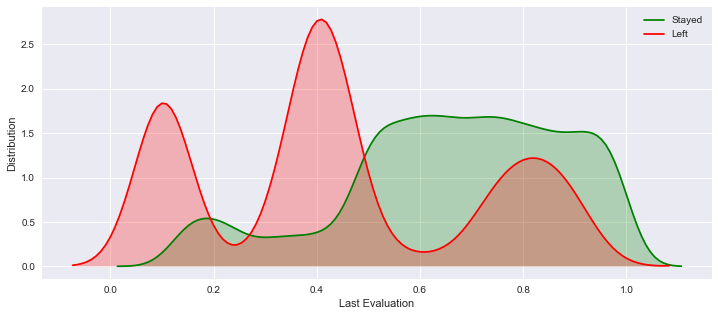

In [63]:
#Since job performance is a continuous variable, kerdel density would give a better idea of the distribution
# Kernel Density Plot
fig = plt.figure(figsize=(12,5),);

#Kde for employees that stayed in green
ax=sns.kdeplot(hr.loc[(hr['Left'] == 0),'Last_Evaluation'] , color='g',shade=True,label='Stayed');

#Kde for employees that left in red
#Use the same axis for overlapping
ax=sns.kdeplot(hr.loc[(hr['Left'] == 1),'Last_Evaluation'] , color='r',shade=True, label='Left');
ax.set(xlabel='Last Evaluation', ylabel='Distribution');

There are fewer low performers among the employees that stayed

### Statistical Test: Is the difference in number of employees that left among groups categorized by job performance statistically significant?

In [28]:
#Breakdown the employees into six categories
#Low performers that left (Last evaluation less than 0.6)
#Low performers that stayed (Last evaluation less than 0.6)
#Average performers that left (Last evaluation more than 0.6 and less than 0.8)
#Average performers that stayed (Last evaluation more than 0.6 and less than 0.8)
#High performers that left (Last evaluation more than 0.8)
#High performers that stayed (Last evaluation more than 0.8)

#Used Z score to determine if the differences in the categories statistically significant

hr['Last_Evaluation'] = hr.Satisfaction_Level.astype(float)

left=np.array(hr[(hr['Left'] == 1)].count()['Last_Evaluation'])
stayed=np.array(hr[(hr['Left'] == 0)].count()['Last_Evaluation'])

lowleft=np.array(hr[(hr['Satisfaction_Level']<0.6)&(hr['Left'] == 1)].count()['Last_Evaluation'])
lowstayed=np.array(hr[(hr['Satisfaction_Level']<0.6)&(hr['Left'] == 0)].count()['Last_Evaluation'])

avgleft=np.array(hr[(hr['Satisfaction_Level']>=0.6)&(hr['Satisfaction_Level']<0.8)&(hr['Left'] == 1)].count()['Last_Evaluation'])
avgstayed=np.array(hr[(hr['Satisfaction_Level']>=0.6)&(hr['Satisfaction_Level']<0.8)&(hr['Left'] == 0)].count()['Last_Evaluation'])

highleft=np.array(hr[(hr['Satisfaction_Level']>=0.8)&(hr['Left'] == 1)].count()['Last_Evaluation'])
highstayed=np.array(hr[(hr['Satisfaction_Level']>=0.8)&(hr['Left'] == 0)].count()['Last_Evaluation'])
                       
z_score_low, p_value_low = sm.stats.proportions_ztest([lowleft, lowstayed], [left, stayed])
print(z_score_low, p_value_low)

z_score_avg, p_value_avg = sm.stats.proportions_ztest([avgleft, avgstayed], [left, stayed])
print(z_score_avg, p_value_avg)
                       
z_score_high, p_value_high = sm.stats.proportions_ztest([highleft, highstayed], [left, stayed])
print(z_score_high, p_value_high)

40.2053346593 0.0
-26.0244507206 2.61918248368e-149
-18.2707525041 1.41486189452e-74


Low p values indicates that the difference in employees that left among low, average and high performers is statistically significant.

### Average Monthly Working Hours

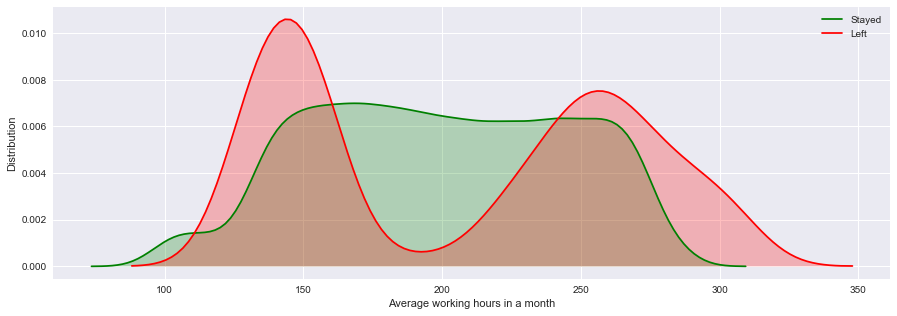

In [64]:
#Since average monthly working hours is a continuous variable, kernel density would give a better idea of the distribution
# Kernel Density Plot
fig = plt.figure(figsize=(15,5),);

#Kde for employees stayed in green
ax=sns.kdeplot(hr.loc[(hr['Left'] == 0),'Average_Monthly_Hours'] , color='g',shade=True,label='Stayed');
#Kde for employees stayed in red
#Use the same axis for overlapping
ax=sns.kdeplot(hr.loc[(hr['Left'] == 1),'Average_Monthly_Hours'] , color='r',shade=True, label='Left');
ax.set(xlabel='Average working hours in a month', ylabel='Distribution');

- Employees that left worked too few or too many hours
- Employess that stayed are evenly distributed across a wide range of average hours worked

### Statistical Test: Is the difference in number of employees that left among groups categorized by number of hours worked statistically significant?

### Number of Projects

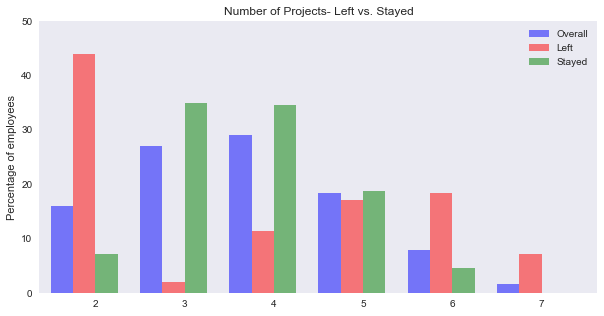

In [66]:
#creating grouped bar plots by number of projects, showing the turnover for overall, employees that left and employees that stayed

#Group employees by number of projects
df1=hr.groupby(['Number_of_Projects']).size().reset_index(name='Num_left');
#Add a column for overall turnover
df1['Overall']= df1['Num_left']*100/df1['Num_left'].sum()

#Group employees that left by number of projects
df2=hr.groupby(['Number_of_Projects', 'Left']).size().reset_index(name='Num_left');
#Filter rows with the "Left" count
dfleft=df2[(df2.Left == 1)];
#Add column with turnover for employees that left
dfleft['Left perc']= dfleft['Num_left']*100/dfleft['Num_left'].sum();
del dfleft['Left']
del dfleft['Num_left']

##Filter rows with the "stayed" count
dfstayed=df2[(df2.Left == 0)];
dfstayed['Stayed perc']= dfstayed['Num_left']*100/dfstayed['Num_left'].sum();
del dfstayed['Left']
del dfstayed['Num_left']

#Create a dataframe with turnover and count for overall, employees that left and employees that stayed
df_new=pd.merge(df1,dfleft,how='left',on='Number_of_Projects')
df_final=pd.merge(df_new,dfstayed,how='left',on='Number_of_Projects')
del df_final['Num_left']

# Setting the positions and width for the bars
pos = list(range(len(df_final['Number_of_Projects']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 'overall' data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df_final['Overall'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label=df_final['Number_of_Projects']) 

# Create a bar with 'left' data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df_final['Left perc'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label=df_final['Number_of_Projects']) 

# Create a bar with 'stayed' data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        df_final['Stayed perc'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the third value in first_name
        label=df_final['Number_of_Projects']) 

#Labels and annotations
# Set the y axis label
ax.set_ylabel('Percentage of employees')

# Set the chart's title
ax.set_title('Number of Projects- Left vs. Stayed')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_final['Number_of_Projects'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,50])

# Adding the legend and showing the plot
plt.legend(['Overall', 'Left', 'Stayed'], loc='upper right')
plt.grid()
plt.show()



- Employees that left worked on too less or too many projects

### Statistical Test: Is the difference in number of employees that left among groups categorized by number of projects they worked on statistically significant?

In [31]:
#Chi squared test is used as the statistical test  
chitest(hr['Left'],hr['Number_of_Projects'])

Number_of_Projects     2     3     4     5    6    7
Left                                                
0                    821  3983  3956  2149  519    0
1                   1567    72   409   612  655  256
Column Percentages
Number_of_Projects         2         3       4         5         6    7
Left                                                                   
0                   0.343802  0.982244  0.9063  0.778341  0.442078  0.0
1                   0.656198  0.017756  0.0937  0.221659  0.557922  1.0
chi-square value, p value, expected counts
(5373.5864800490453, 0.0, 5, array([[ 1819.45889726,  3089.57530502,  3325.76971798,  2103.65411027,
          894.49109941,   195.05087006],
       [  568.54110274,   965.42469498,  1039.23028202,   657.34588973,
          279.50890059,    60.94912994]]))


In [32]:
#Pair-wise chi test/Mc Nemar's test to investigate if there certain categories with a higher difference.

pairwise_chitests(hr['Left'],hr['Number_of_Projects'])

Number_of_Projects         2         3       4         5         6    7
Left                                                                   
0                   0.343802  0.982244  0.9063  0.778341  0.442078  0.0
1                   0.656198  0.017756  0.0937  0.221659  0.557922  1.0
p values less than significance level after Bonferroni correction for all pairwise chi-square tests
[[2, 3], 0.0]
[[2, 4], 0.0]
[[2, 5], 5.0088056721999265e-217]
[[2, 6], 1.5617487065295371e-08]
[[2, 7], 2.9982931749132871e-29]
[[3, 4], 1.4203219315837704e-50]
[[3, 5], 4.9361277195728263e-166]
[[3, 6], 0.0]
[[3, 7], 0.0]
[[4, 5], 9.1938404750590449e-51]
[[4, 6], 1.0688392192209844e-280]
[[4, 7], 0.0]
[[5, 6], 1.8809922895183283e-94]
[[5, 7], 8.2331698957481813e-152]
[[6, 7], 4.1273028661668092e-40]


Low p-value suggests that we can reject the null hypothesis, difference in number of employees that left among employees grouped by number of projects they worked on is statistically significant

### Work Accidents

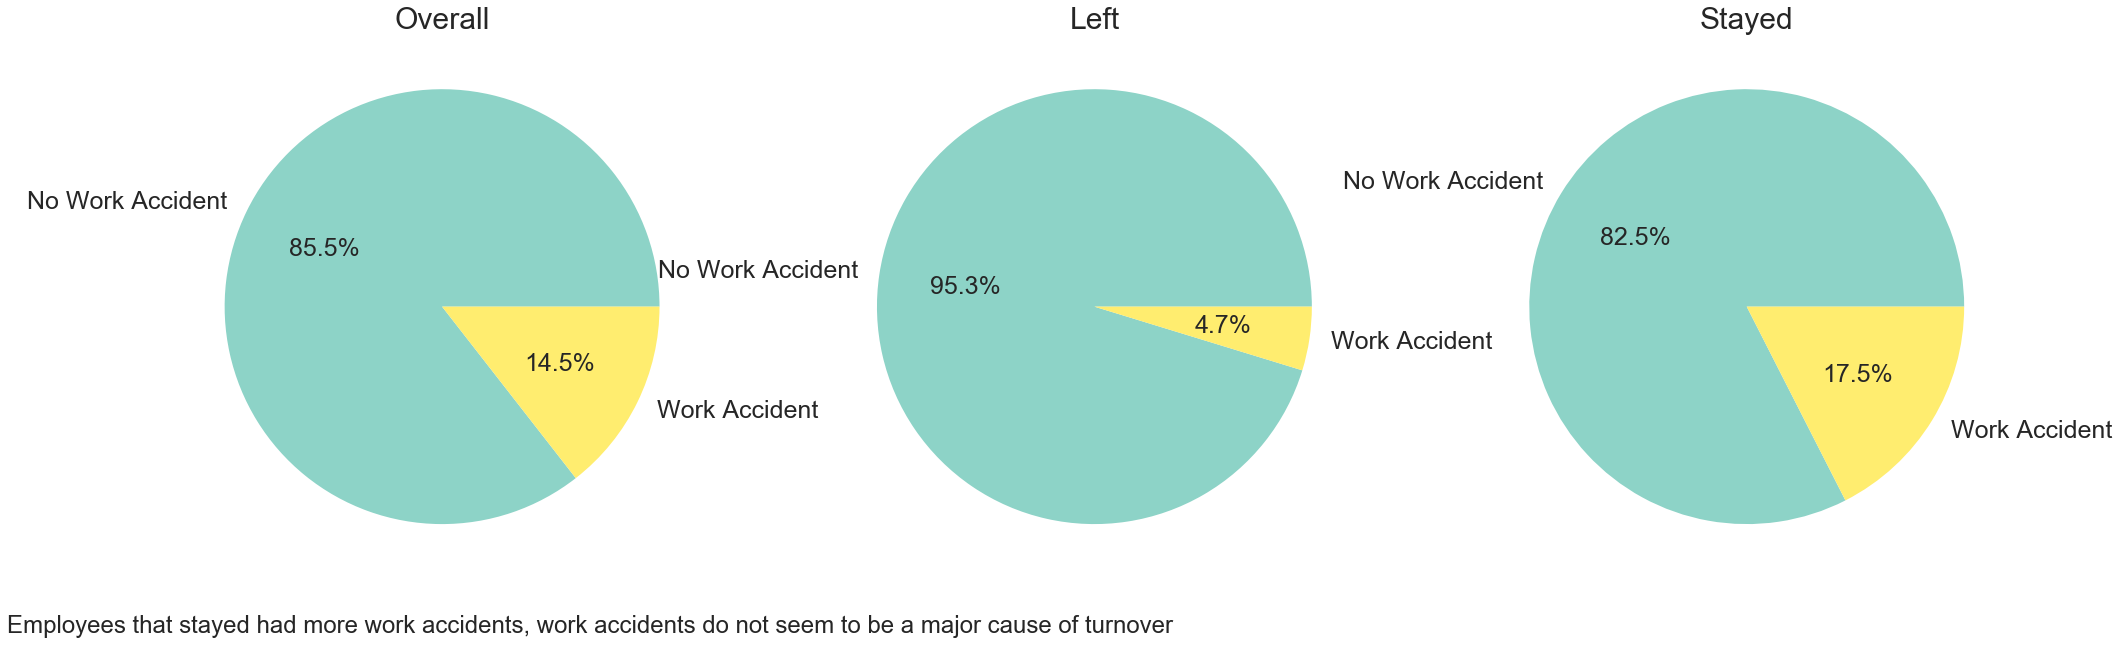

In [33]:
#Create multiple pie charts to show the proportion of work accidents Overall, employees that left and employees that stayed
fig = plt.figure();
#Add three subplots
ax1 = fig.add_subplot(131);
plt.title("Overall", fontsize = 30);
ax2 = fig.add_subplot(132);
plt.title("Left",fontsize=30);
ax3 = fig.add_subplot(133);
plt.title("Stayed",fontsize=30);

#This helps get the pie chart fit into the frame
ax1.text(-2,-1.5,'Employees that stayed had more work accidents, work accidents do not seem to be a major cause of turnover',fontsize=24)
x0, y0, dx, dy = ax1.get_position().bounds;
maxd = max(dx, dy);
width =10 * maxd / dx;
height = 10 * maxd / dy;
fig.set_size_inches((width, height));
dfprom1=hr.groupby(['Work_Accident']).size().reset_index(name='Num_left');
cmap = plt.cm.Set3;
colors1 = cmap(np.linspace(0., 1., 2));

#Pie chart for employees that stayed
patches, texts, autotexts = ax1.pie(dfprom1['Num_left'], labels=['No Work Accident','Work Accident'],autopct='%1.1f%%',colors=colors1);

#Set font size
proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);


dfprom=hr.groupby(['Work_Accident', 'Left']).size().reset_index(name='Num_left');
dfleftprom=dfprom[(dfprom.Left == 1)];
dfstayedprom=dfprom[(dfprom.Left == 0)];

#Pie chart for employees that left
patches, texts, autotexts = ax2.pie(dfleftprom['Num_left'], labels=['No Work Accident','Work Accident'],autopct='%1.1f%%',colors=colors1);

#Set font size
proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease)

#Pie chart for employees that stayed
patches, texts, autotexts = ax3.pie(dfstayedprom['Num_left'], labels=['No Work Accident','Work Accident'],autopct='%1.1f%%',colors=colors1);

#Set font size
proptease = fm.FontProperties();
proptease.set_size(25);
plt.setp(autotexts, fontproperties=proptease);
plt.setp(texts, fontproperties=proptease);

### Statistical Test: This is merely an opinion, we would need more information to determine statistical significance.

Consulted Resources:
    http://blog.minitab.com/blog/understanding-statistics/understanding-qualitative-quantitative-attribute-discrete-and-continuous-data-types
 
 Family wise error rate
 https://en.wikipedia.org/wiki/Family-wise_error_rate
 
 Type 1 and 2 errors
 https://en.wikipedia.org/wiki/Type_I_and_type_II_errors
 http://www.statisticshowto.com/type-i-and-type-ii-errors-definition-examples/
 
 Generating pairs in every possible way
 https://stackoverflow.com/questions/942543/operation-on-every-pair-of-element-in-a-list
 
 https://www.coursera.org/learn/data-analysis-tools